<a href="https://colab.research.google.com/github/vigneshsharma1997/Heart_Disease/blob/main/Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
url = 'https://raw.githubusercontent.com/vigneshsharma1997/Assignments/main/breastcancer.csv'

In [2]:
import sklearn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(url)

In [7]:
df.drop(['Unnamed: 0'],axis=1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091,0
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978,0
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409,0
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635,0


In [8]:
df.shape

(569, 32)

In [9]:
x_train = df.drop('target',inplace=False,axis=1)
y_train=df['target']

x_train = x_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

x_train = np.array(x_train,dtype=float)
y_train = np.array(y_train,dtype=float)




In [11]:
y_train.shape

(569,)

In [20]:
y_train=np.array(y_train).reshape(-1,1)

In [27]:
class perceptron:
  def __init__(self,x,y):
    self.input = np.array(x,dtype=float)
    self.label = np.array(y,dtype=float)
    self.weights = np.random.rand(x.shape[1],y.shape[1])
    self.z = np.dot(self.input,self.weights) #apply dot product
    self.yhat = self.sigmoid(self.z) #Apply activation function

  def sigmoid(self,x):
    return 1.0 / (1.0 + np.exp(-x))
  
  def sigmoid_deriv(self, x):
    s = sigmoid(x)
    return s(1-s)
  
  def forward_prop(self):
    self.yhat = self.sigmoid(self.input @ self.weights) #@ symbol represents matrix multiplication (also works for vectors)
    return self.yhat

  def back_prop(self):
    gradient = self.input.T@(-2.0*(self.label-self.yhat)*self.sigmoid(self.yhat))

    self.weights = self.weights - gradient

In [28]:
simple_nn = perceptron(x_train,y_train)
training_iterations = 1000
history = [] #will store how mse changes after each iteration in this array

def mse(y,yhat):
  sum=0.0
  for pred,label in zip(yhat,y):
    sum = sum + (pred-label)**2
    return sum/len(yhat)

for i in range(training_iterations):
    simple_nn.forward_prop()
    simple_nn.back_prop
    yhat = simple_nn.forward_prop()
    history.append(mse(yhat,simple_nn.label))

yhat = simple_nn.forward_prop()
print(f"Final Mean Squared Error: {mse(yhat,simple_nn.label)}")
  

Final Mean Squared Error: [0.00175747]


Text(0.5, 0, 'Training Iterations')

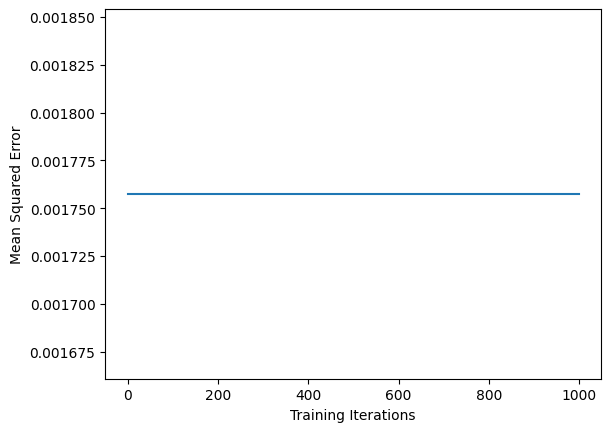

In [29]:
plt.plot(history)
plt.ylabel('Mean Squared Error')
plt.xlabel('Training Iterations')